## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear and Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/mtcars.csv")
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
print(df.shape)

(32, 12)


In [4]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'drat')
df = removeOutliers(df,'wt')

In [5]:
df.dropna()
print(df.shape)

(29, 12)


In [6]:
x = df[['drat']]
y = df[['wt']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (9, 1) (20, 1) (9, 1)


In [9]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [10]:
print(reg.coef_)
print(reg.intercept_)

[[-1.02540647]]
[6.66619663]


In [11]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


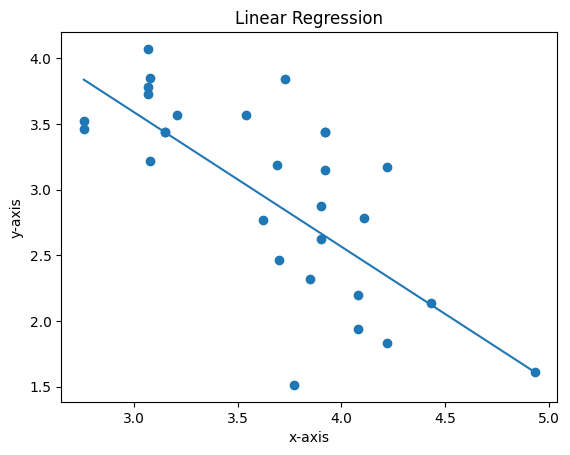

In [12]:
plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [13]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

0.29777611494921374
0.29097590389652916


In [14]:
df['drat'].corr(df['wt'])

-0.7203742287907307

In [15]:
df.shape

(29, 12)

In [16]:
columns = ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
for col in columns:
    df = removeOutliers(df,col)

In [17]:
df.dropna()
df.shape

(27, 12)

In [18]:
x1 = np.column_stack((df[['cyl']], df[['disp']], df[['hp']], df[['drat']], df[['wt']], df[['qsec']], df[['vs']], df[['am']], df[['gear']], df[['carb']] ))
y1 = df[['mpg']]

In [19]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [20]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(18, 10) (9, 10) (18, 1) (9, 1)


In [21]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [22]:
print(reg1.coef_)
print(reg1.intercept_)

[[ 4.22843894e-01  4.14279122e-02  2.79651812e-04  6.51889906e-01
  -5.42993107e+00  3.86526030e+00 -2.29524789e+00  3.77180818e+00
   4.43126669e+00  2.33461700e-02]]
[-62.11065517]


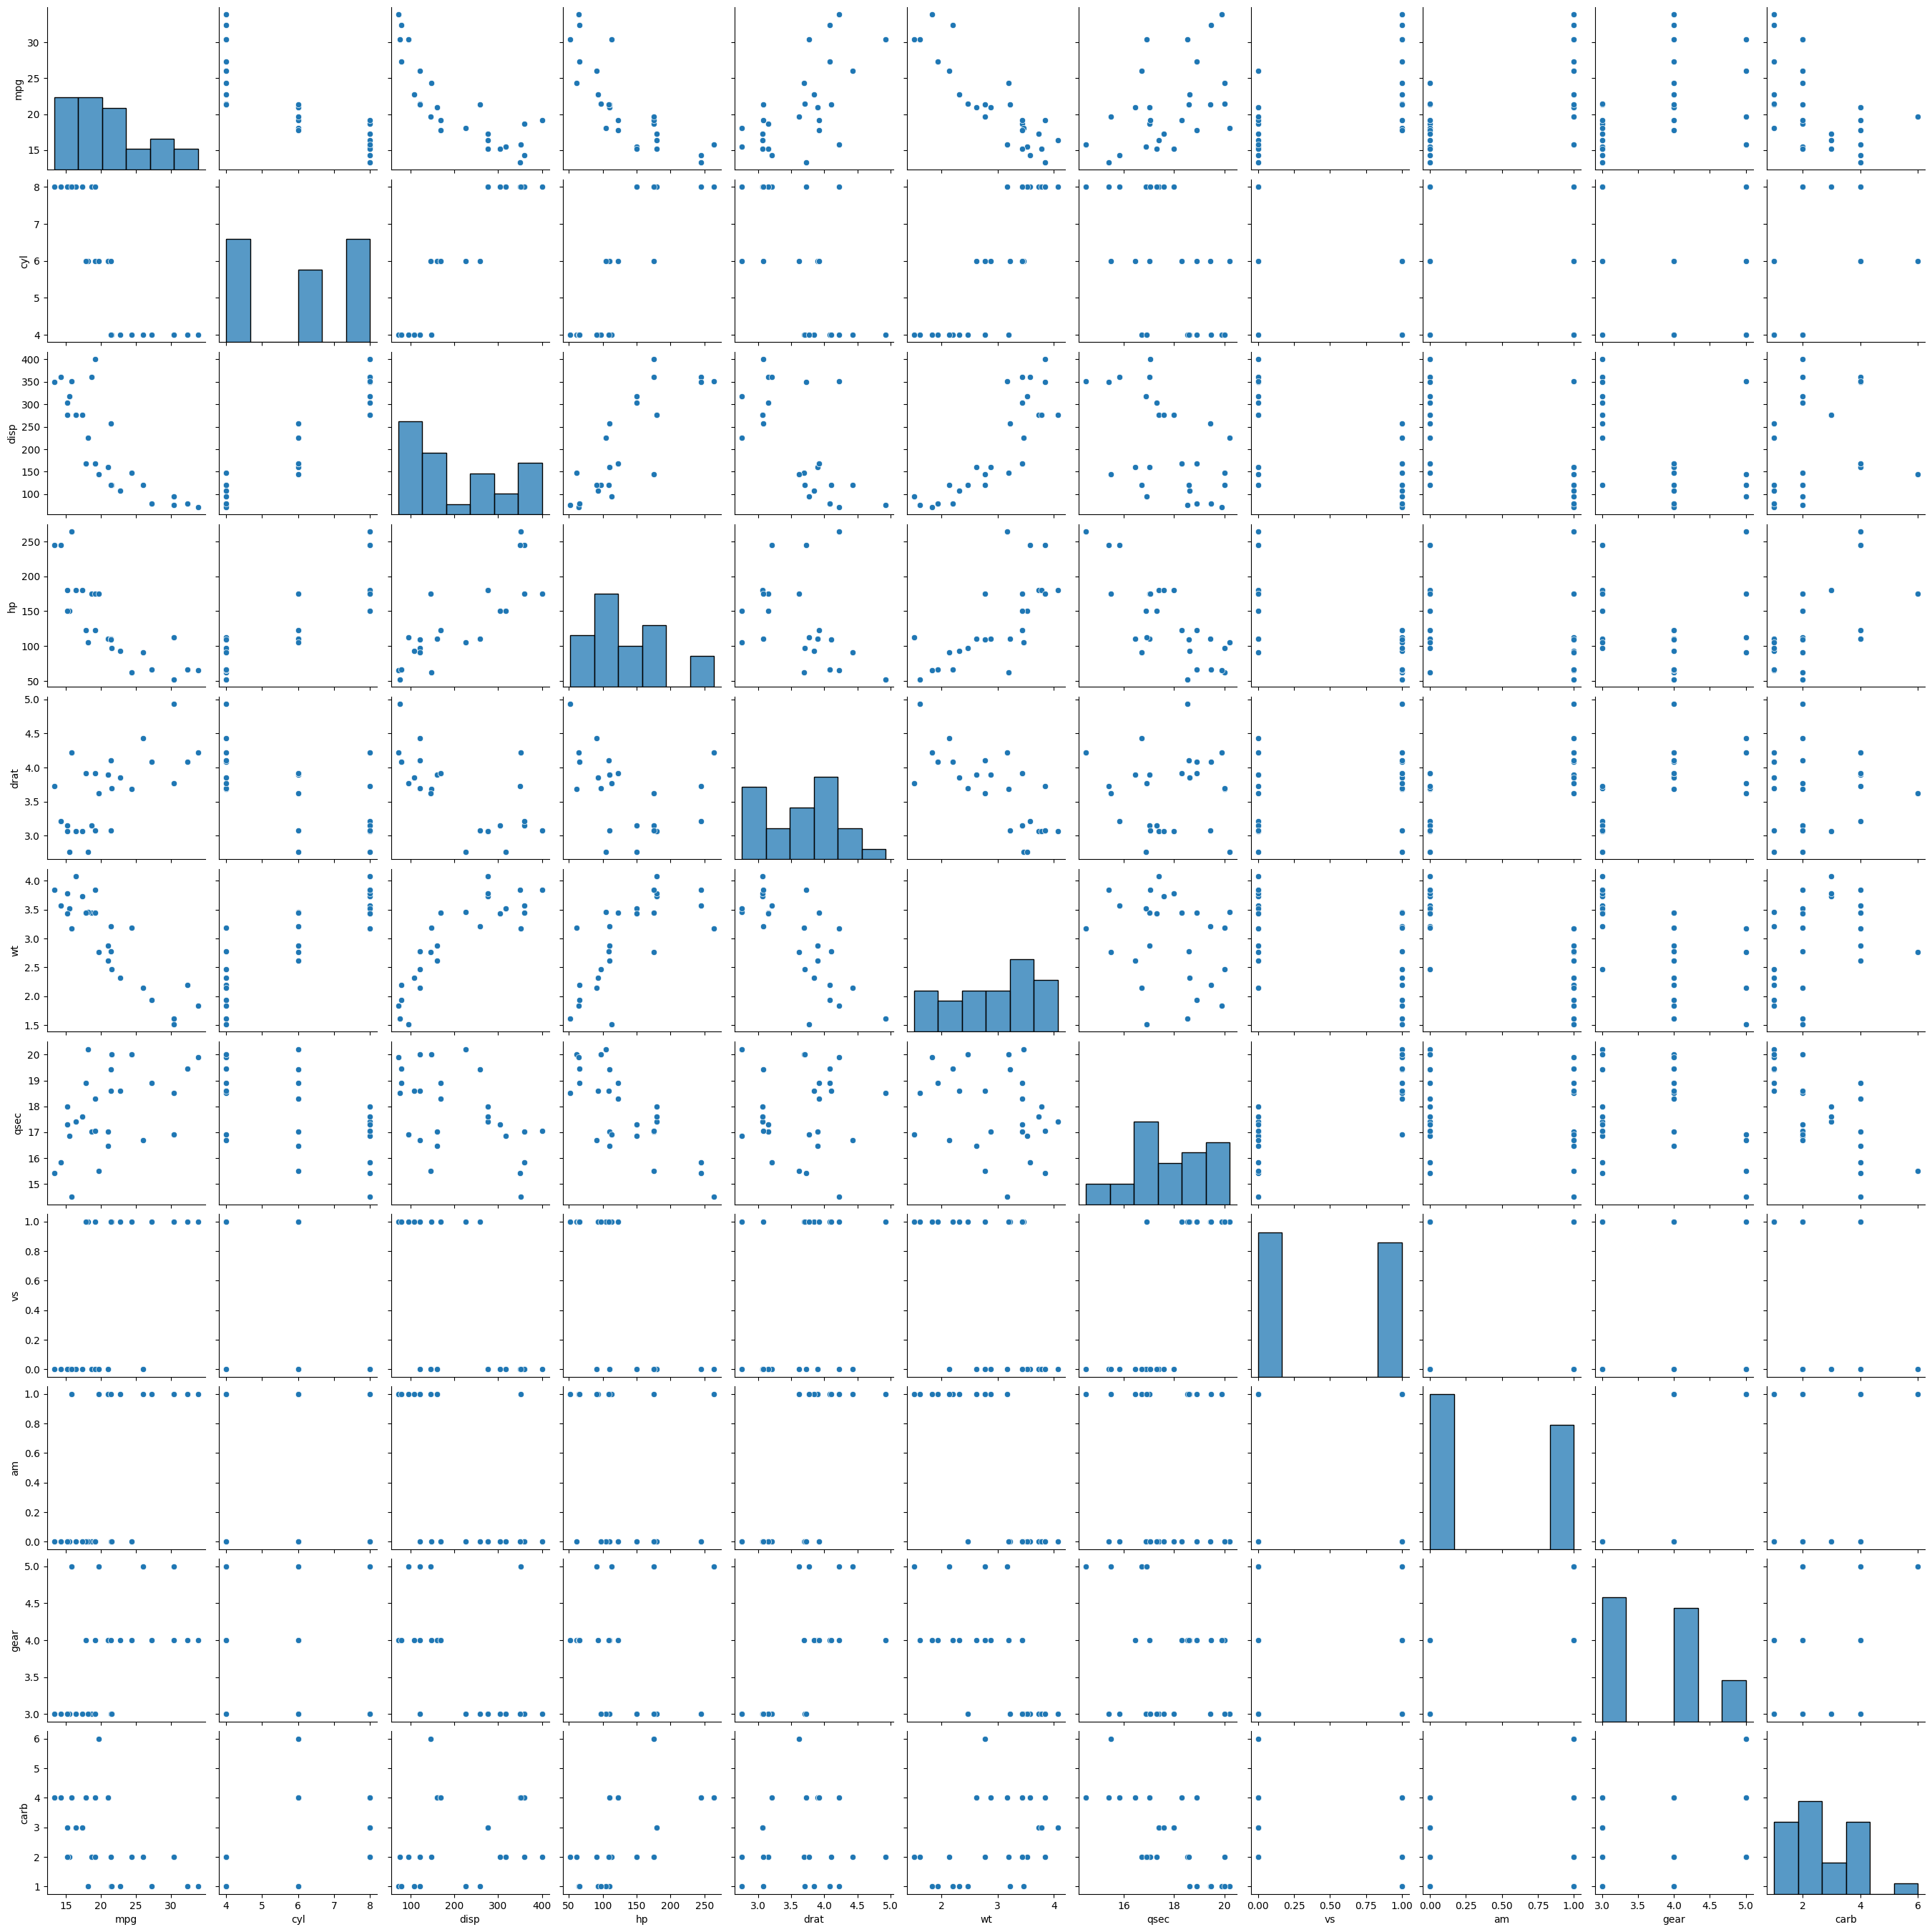

In [23]:
sns.pairplot(df)

In [24]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

14.205790303712613
0.7114960849963088


In [25]:
df.shape

(27, 12)

In [26]:
df = removeOutliers(df,'disp')
df = removeOutliers(df,'mpg')

In [27]:
df.dropna()
print(df.shape)

(26, 12)


In [28]:
x2 = df[['disp']]
y2 = df[['mpg']]

In [29]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [30]:
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(18, 1) (8, 1) (18, 1) (8, 1)


In [31]:
deg = 2

poly_features = PolynomialFeatures(degree=deg)
x2_train_poly = poly_features.fit_transform(x2_train)

In [32]:
reg2 = LinearRegression()
reg2.fit(x2_train_poly, y2_train)

LinearRegression()

In [33]:
print(reg2.coef_)
print(reg2.intercept_)

[[ 0.         -0.11332262  0.00017826]]
[34.12083726]


In [34]:
x_range = np.linspace(x2.min(), x2.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_range_pred = reg2.predict(x_range_poly)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


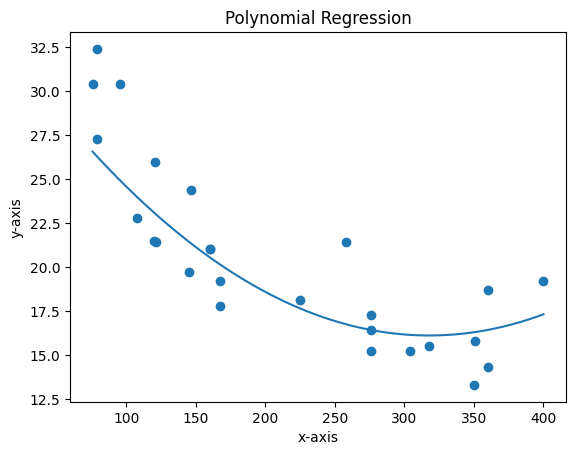

In [35]:
plt.scatter(x2, y2)
plt.plot(x_range, y_range_pred)

plt.title('Polynomial Regression')
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [36]:
x2_test_poly = poly_features.transform(x2_test)
y2_pred = reg2.predict(x2_test_poly)

mse2 = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print(mse2)
print(r2)

10.71648792814235
0.7333367441548722
